<a href="https://colab.research.google.com/github/marcus-santos/ifsp-carcdsi-playground/blob/main/PreProcessamento_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')
caminho = "/content/drive/MyDrive/IFSP/Ciencia_Dados/Material/"

Mounted at /content/drive


## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

## Base de Dados de Crédito

In [9]:
base_credit = pd.read_csv(caminho + "credit_data.csv")

base_credit

# Análise de cada um dos atributos
# id: é nominal, não tem uma ordenação ou classificação, é uma identificação, como um nome
# income: renda - continua (int seria discreta)
# loan: divida - continua
# default: classe -pagou ou não pagou empréstimo - não ordinal porque não tem ordem, não é continua, é discreta

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [10]:
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [11]:
# Cliente com maior renda

# base_credit[base_credit['income' >= 69995]]

base_credit[base_credit['income'].max() == base_credit['income']]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [12]:
# Cliente com a menor dívida

base_credit[base_credit['loan'].min() == base_credit['loan']]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


## Visualização de Dados - Gráficos

In [13]:
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

<Axes: xlabel='default', ylabel='count'>

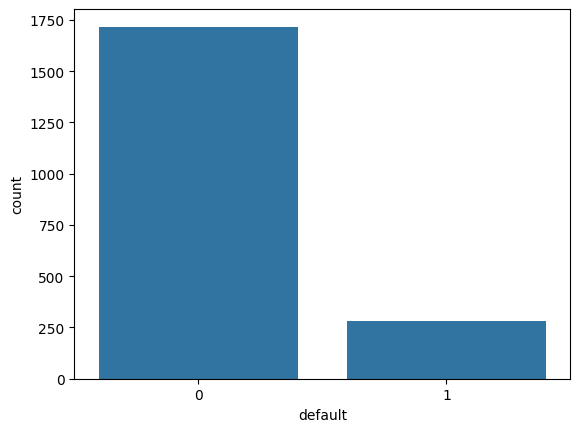

In [14]:
sns.countplot(x = base_credit['default'])

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

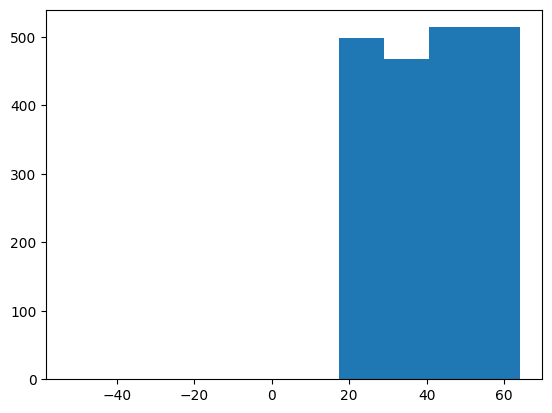

In [15]:
plt.hist(x = base_credit['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

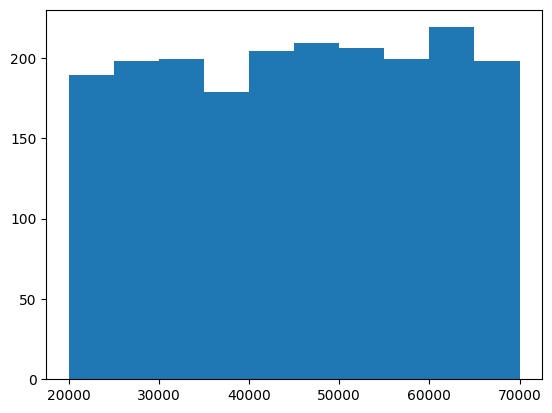

In [16]:
plt.hist(x = base_credit['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

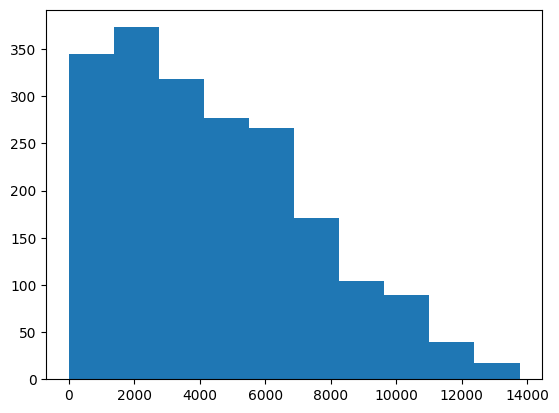

In [17]:
plt.hist(x = base_credit['loan'])

In [19]:
fig = px.scatter_matrix(base_credit, dimensions=['age','income', 'loan'], color='default')
fig.show()

## Tratamento Valores Inconsistentes

In [21]:
# Já detectamos que temos idades negativas, mas idades negativas não existem
# Primeiro vamos localixar os registros

base_credit.loc[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


## Temos 04 (quatro) técnicas de ajustes

### 1 - Apagar a coluna com problemas

In [22]:
base_credit1 = base_credit.drop('age', axis = 1)
base_credit1

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


### 2 - Apagar somente os registros com inconsistências

In [25]:
base_credit.index

RangeIndex(start=0, stop=2000, step=1)

In [24]:
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit2

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [26]:
base_credit2.loc[base_credit2['age'] < 0]

,clientid,income,age,loan,default


### 3 - Preencher os valores manualmente

### 4.1 - Preencher com o valor positivo, módulo, neste caso específico.
Outra maneira é preencher com o valor médio.

In [28]:
# Converter valores negativos para positivos

base_credit3 = base_credit.copy()
base_credit3['age'] = base_credit3['age'].abs()
base_credit3.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.924874,4444.369695,0.141500
std,577.494589,14326.327119,13.267741,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.033679,1939.708847,0.000000
50%,1000.500000,45789.117313,41.353171,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### 4.2 - Preencher com a média dos valores

In [29]:
base_credit4 = base_credit.copy()
base_credit4.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [30]:
base_credit4['age'].mean()

np.float64(40.80755937840458)

In [31]:
base_credit4['age'][base_credit4.age > 0].mean()

np.float64(40.92770044906149)

In [32]:
# base_credit4.loc[base_credit4.age < 0, 'age] = 40.92

base_credit4.loc[base_credit4.age < 0, 'age'] = base_credit4['age'][base_credit4.age > 0].mean()
base_credit4.describe()


,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.927700,4444.369695,0.141500
std,577.494589,14326.327119,13.261825,3045.410024,0.348624
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,500.750000,32796.459717,29.072097,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


### Tratamento de valores faltantes

In [33]:
base_credit3.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [34]:
base_credit3.loc[pd.isnull(base_credit3['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [35]:
# Preencher valores nulos na coluna 'age' com a média dos valores da própria coluna

base_credit3['age'] = base_credit3['age'].fillna(base_credit3['age'].mean())

In [36]:
base_credit3.loc[pd.isnull(base_credit3['age'])]

,clientid,income,age,loan,default


In [37]:
base_credit3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [38]:
base_credit3.loc[base_credit3['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.924874,2082.625938,0
30,31,48528.852796,40.924874,6155.784670,0
31,32,23526.302555,40.924874,2862.010139,0


In [39]:
fig = px.scatter_matrix(base_credit3, dimensions=['age','income', 'loan'], color='default')
fig.show()

## Salvando o DataFrame tratado

In [41]:
base_credit3.to_csv(caminho+"credit_data_refined.csv")

## Divisão entre preditores e classe

In [45]:
x_credit = base_credit3.iloc[:, 1:4].values
y_credit = base_credit3.iloc[:, 4].values


In [46]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [48]:
type(x_credit)

numpy.ndarray

In [49]:
y_credit = base_credit3.iloc[:, 4].values

In [50]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

## Escalonamento de valores

In [51]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(np.float64(20014.4894700497),
 np.float64(18.055188510566897),
 np.float64(1.37762959325451))

In [52]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(np.float64(69995.6855783239),
 np.float64(63.971795841120205),
 np.float64(13766.0512393337))

In [53]:
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [54]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(np.float64(-1.7676158019964077),
 np.float64(-1.7254323179314786),
 np.float64(-1.4592791099462408))

In [55]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(np.float64(1.7220222385319197),
 np.float64(1.738804143417582),
 np.float64(3.0616609141708273))

In [56]:
x_credit

array([[ 1.45393393,  1.36498445,  1.20281942],
       [-0.76217555,  0.54263059,  0.69642695],
       [ 0.83682073,  1.67363771,  1.17471147],
       ...,
       [-0.07122592, -0.97383827,  0.35420081],
       [-0.11000289,  1.73880414, -0.92675625],
       [ 1.682986  ,  1.14887632,  0.96381038]])

## Divisão das base em treinamento e teste

In [57]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size=0.25, random_state=0)

In [58]:
x_credit_treinamento.shape

(1500, 3)

In [59]:
y_credit_treinamento.shape

(1500,)

In [60]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

## Salvar variáveis

In [61]:
with open(caminho + 'credit.pkl', mode='wb') as f:
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)